**This notebook is primarily intened for Model Training, Tuning and Evaluation of The Multiclass CNN Model**

9 Class Model (Heavy)

# Loading Dataset

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/MyDrive/Codes/eye_cropped.rar" "/tmp"

Streaming output truncated to the last 5000 lines.
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right289.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right29.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right290.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right291.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right292.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right293.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right294.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right295.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/eye_leftupper_right296.jpg      72%  OK 
Extracting  /tmp/eye_cropped/training/upper_right/

# Data Preprocessing and Model Making

## Imports

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Train Validation Generator with Augmentation
Image Size = Width: 40, Height: 25 
Maybe Resize = 30,30

In [ ]:
TRAINING_DIR = "/tmp/eye_cropped/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/eye_cropped/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=100
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=100
)

Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


In [ ]:
validation_generator

## Model Creation

### Basic Conv Model
Some Clarification:

1.   **Steps Per Epoch:** It is normally the number of unique samples in training set / batch size = 14400 / 128
2.   **Validation Steps:** Same as above. Replace training with validation.



In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0         
_________________________________________________________________
dropout (Dropout)            (None, 56448)             0

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=150,
)

In [ ]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.Precision(), 
                                                                               tf.keras.metrics.Recall(),
                                                                               'accuracy'])


history = model.fit(train_generator, epochs=25, steps_per_epoch=144, validation_data = validation_generator, verbose = 1, validation_steps=36)

#model.save("/tmp/models/conv_heavy.h5")

Epoch 1/25
144/144 [==============================] - 52s 130ms/step - loss: 1.9152 - precision: 0.5417 - recall: 0.1469 - accuracy: 0.3693 - val_loss: 0.4887 - val_precision: 0.9315 - val_recall: 0.7822 - val_accuracy: 0.8850
Epoch 2/25
144/144 [==============================] - 18s 128ms/step - loss: 0.8830 - precision: 0.7562 - recall: 0.5967 - accuracy: 0.6888 - val_loss: 0.1430 - val_precision: 0.9599 - val_recall: 0.9442 - val_accuracy: 0.9533
Epoch 3/25
144/144 [==============================] - 18s 128ms/step - loss: 0.5210 - precision: 0.8463 - recall: 0.7912 - accuracy: 0.8176 - val_loss: 0.1117 - val_precision: 0.9645 - val_recall: 0.9597 - val_accuracy: 0.9619
Epoch 4/25
144/144 [==============================] - 18s 127ms/step - loss: 0.3377 - precision: 0.8994 - recall: 0.8728 - accuracy: 0.8861 - val_loss: 0.1606 - val_precision: 0.9333 - val_recall: 0.9322 - val_accuracy: 0.9322
Epoch 5/25
144/144 [==============================] - 19s 128ms/step - loss: 0.2674 - precis

In [ ]:
history.history.keys()


dict_keys(['loss', 'precision', 'recall', 'accuracy', 'val_loss', 'val_precision', 'val_recall', 'val_accuracy'])

In [ ]:
model.save("/tmp/models/conv_heavy")

INFO:tensorflow:Assets written to: /tmp/models/conv_heavy/assets


In [ ]:
!zip "/tmp/models/conv_heavy.zip" "/tmp/models/conv_heavy"

  adding: tmp/models/conv_heavy/ (stored 0%)


In [ ]:
 36 / (144+36) * 100

20.0

**Model Performace Evaluation**

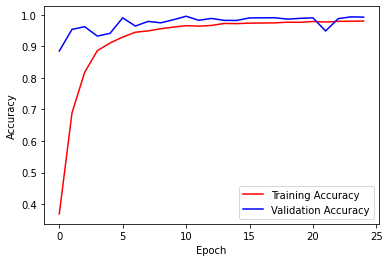

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
#plt.title('Training and validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

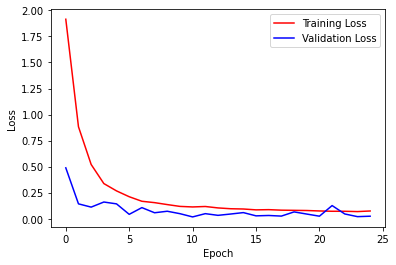

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.title('Training and validation accuracy')
plt.ylabel("precision")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

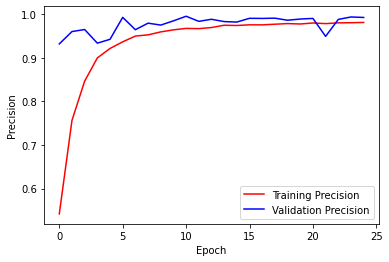

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, precision, 'r', label='Training Precision')
plt.plot(epochs, val_precision, 'b', label='Validation Precision')
#plt.title('Training and validation accuracy')
plt.ylabel("Precision")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

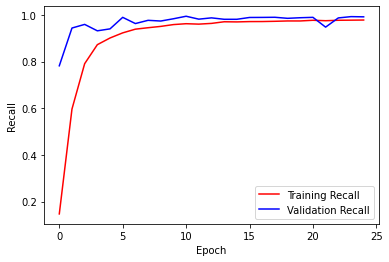

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, recall, 'r', label='Training Recall')
plt.plot(epochs, val_recall, 'b', label='Validation Recall')
#plt.title('Training and validation accuracy')
plt.ylabel("Recall")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_generator.class_indices

{'down': 0,
 'left': 1,
 'lower_left': 2,
 'lower_right': 3,
 'middle': 4,
 'right': 5,
 'up': 6,
 'upper_left': 7,
 'upper_right': 8}

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

class_list = ["down", "left", "lower_left", "lower_right","middle", "right", "up","upper_left", "upper_right"]

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(50, 50))
  x = image.img_to_array(img)
  x = x / 255
  #x = np.expand_dims(x, axis=0)
  x = x.reshape((1,) + x.shape)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #print(fn)
  #print(classes)
  for i in range(classes.shape[1]):
    if np.round_(classes[0,i]) == 1:
      print(class_list[i])                

In [ ]:
for i in range(classes.shape[1]):
  if classes[0,i] == 1:
    print(class_list[i])

lower_left


In [ ]:
classes.shape[1]

9

# Confusion Matrix

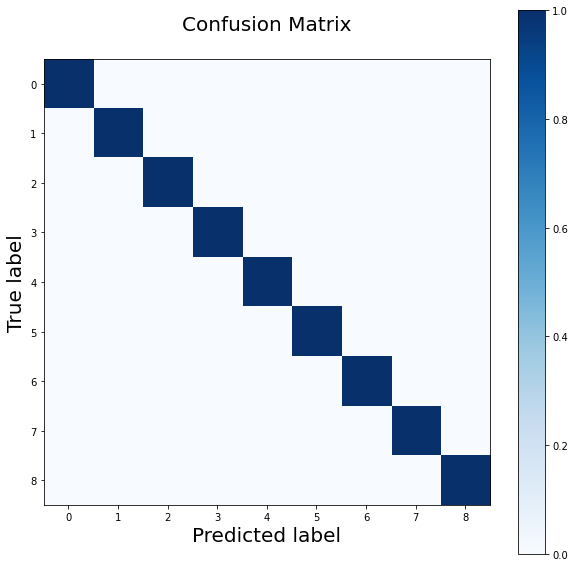

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = []     # store all the generated data batches
labels = []   # store all the generated label batches
max_iter = 36  # maximum number of iterations, in each iteration one batch is generated; the proper value depends on batch size and size of whole data
i = 0
for d, l in validation_generator:
    data.append(d)
    labels.append(l)
    i += 1
    if i == max_iter:
        break

data = np.array(data)
data = np.reshape(data, (data.shape[0]*data.shape[1],) + data.shape[2:])

labels = np.array(labels)
labels = np.reshape(labels, (labels.shape[0]*labels.shape[1],) + labels.shape[2:])


X_test, y_test = data, labels

y_preds = model.predict(X_test)


# Create a confusion matrix
#import itertools
from sklearn.metrics import confusion_matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(tf.argmax(tf.constant(y_test)), tf.argmax(tf.round(y_preds)))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#   plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
#            horizontalalignment="center",
#            color="white" if cm[i, j] > threshold else "black",
#            size=15)

In [ ]:
tf.constant(y_test).shape

TensorShape([3600, 9])

In [ ]:
tf.round(y_preds).shape

TensorShape([3600, 9])